In [1]:
from modules import EDM as ccm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
lista = ["Atlanta-Sandy Springs-Alpharetta, GA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "Dallas-Fort Worth-Arlington, TX MSA",
    "Denver-Aurora-Lakewood, CO MSA",
    "Detroit_Dearborn, MI MSA",
    "Houston-The Woodlands-Sugar Land, TX MSA",
    "Los Angeles-Long Beach-Anaheim, CA MSA",
    "Miami-Fort Lauderdale-West Palm Beach, FL MSA",
    "Minneapolis-St. Paul-Bloomington, MN-WI MSA",
    "New York-Newark-Jersey City, NY-NJ-PA MSA",
    "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",
    "Phoenix-Mesa-Chandler, AZ MSA",
    "Riverside-San Bernardino-Ontario, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Tampa-St. Petersburg-Clearwater, FL MSA",
    "Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"]
Neg_tweets_optimal_E = []
Neg_tweets_optimal_tau = []
Pos_tweets_optimal_E = []
Pos_tweets_optimal_tau = []
crimes_optimal_E = []
crimes_optimal_tau = []
PB_optimal_tau = 6
PB_optimal_E = 17
df = pd.read_csv("data/Times_series_sa_det.csv")
neg_tweet_opt_df = pd.read_csv("data/Non_stationary_Negative_tweets_Embedding_optimization.csv")
pos_tweet_opt_df = pd.read_csv("data/Non_stationary_Positive_tweets_Embedding_optimization.csv")
PB_opt_df = pd.read_csv("data/Non_stationary_PB_Embedding_optimization.csv")
CR_opt_df = pd.read_csv("data/Non_stationary_Crimes_Embedding_optimization.csv")
for l in lista:
    E_TW = int(neg_tweet_opt_df[neg_tweet_opt_df["City"]==l].sort_values(by=['rho'],ascending=False).iloc[0]["E"])
    tau_TW = int(neg_tweet_opt_df[neg_tweet_opt_df["City"]==l].sort_values(by=['rho'],ascending=False).iloc[0]["taw"][-1])
    Neg_tweets_optimal_E.append(E_TW)
    Neg_tweets_optimal_tau.append(tau_TW)
    
    E_PTW = int(pos_tweet_opt_df[pos_tweet_opt_df["City"]==l].sort_values(by=['rho'],ascending=False).iloc[0]["E"])
    tau_PTW = int(pos_tweet_opt_df[pos_tweet_opt_df["City"]==l].sort_values(by=['rho'],ascending=False).iloc[0]["taw"][-1])
    Pos_tweets_optimal_E.append(E_PTW)
    Pos_tweets_optimal_tau.append(tau_PTW)
    
    E_CR = int(CR_opt_df[CR_opt_df["City"]==l].sort_values(by=['rho'],ascending=False).iloc[0]["E"])
    tau_CR = int(CR_opt_df[CR_opt_df["City"]==l].sort_values(by=['rho'],ascending=False).iloc[0]["taw"][-1])
    crimes_optimal_E.append(E_CR)
    crimes_optimal_tau.append(tau_CR)

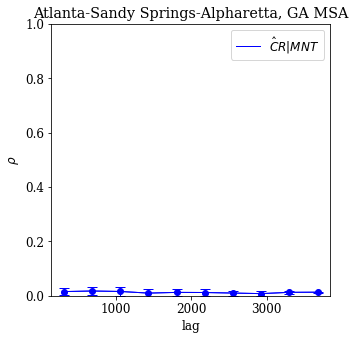

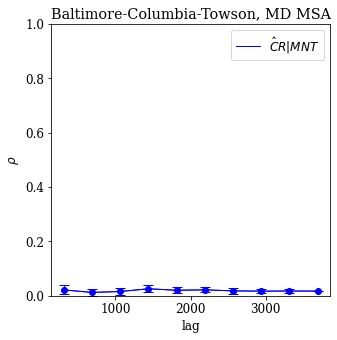

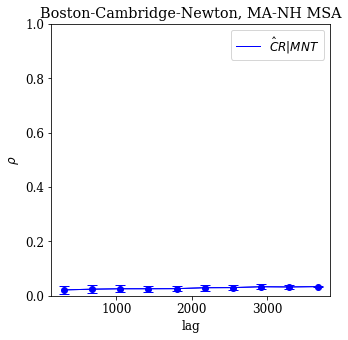

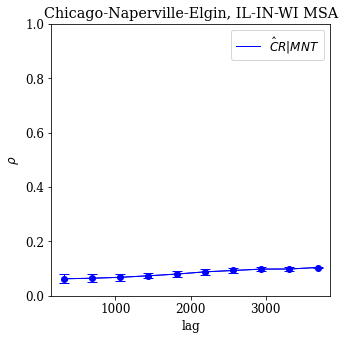

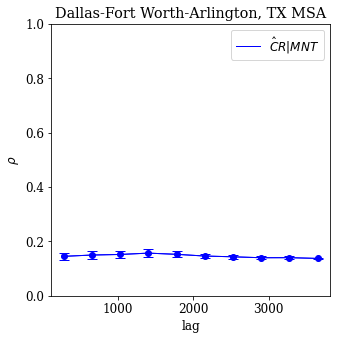

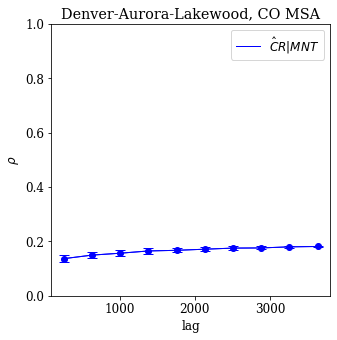

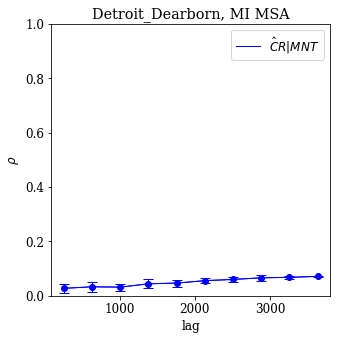

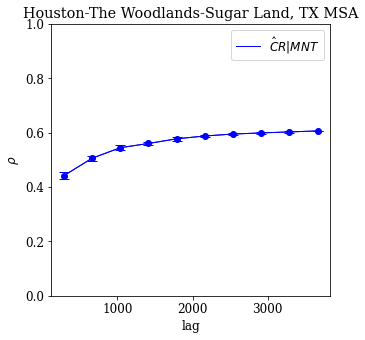

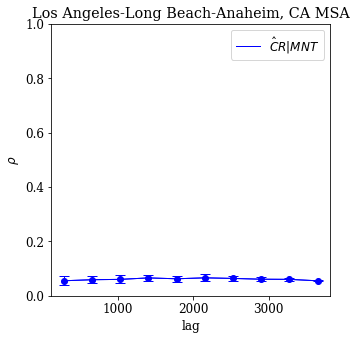

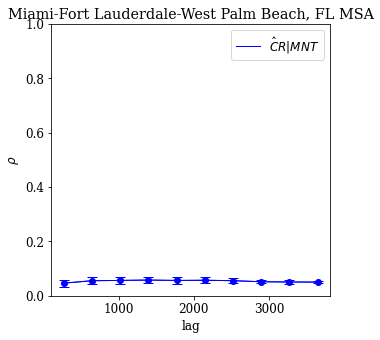

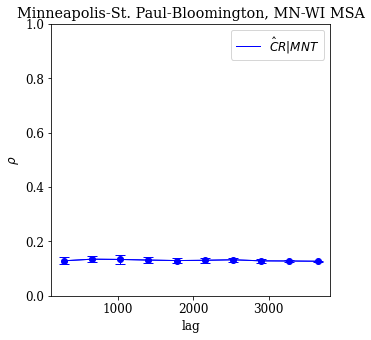

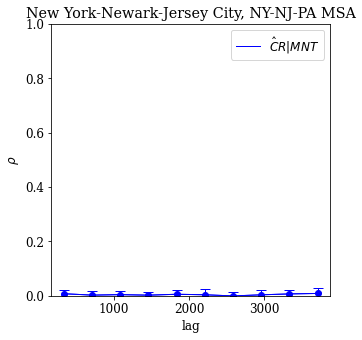

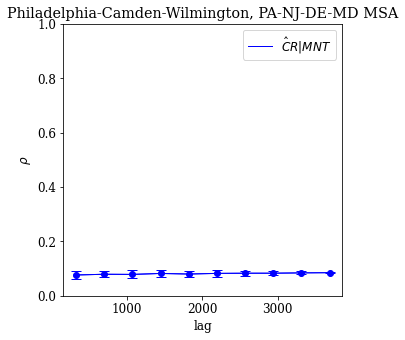

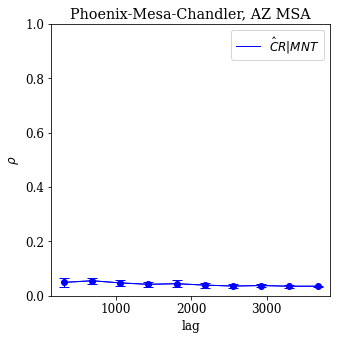

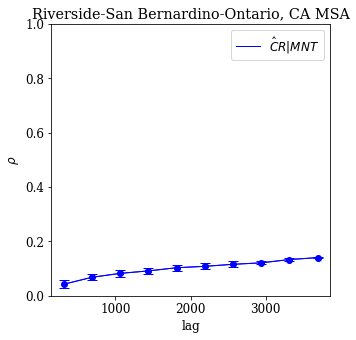

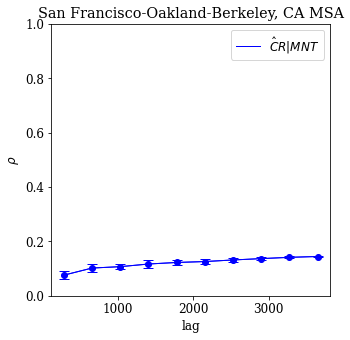

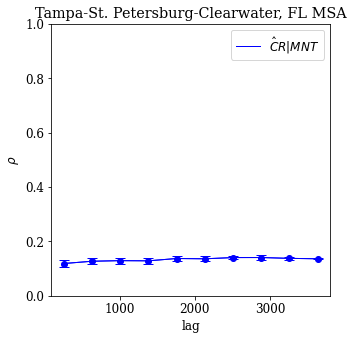

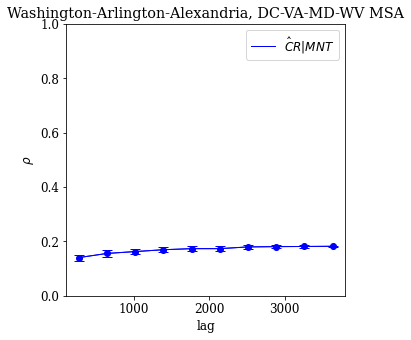

In [3]:
## negative_tweets and crimes
for i in range(len(lista)):
    df_source_hat_knowing_target= ccm.Get_CCM_Plot_df(
                          source = df[lista[i]+"_crimes_lagged"],
                          target = df["Tweet search - "+lista[i]+"_sent_Hugged_Negative"],
                          nsamp = 30, m_source=crimes_optimal_E[i], m_target=Neg_tweets_optimal_E[i],
                          tau_source=crimes_optimal_tau[i], tau_target=Neg_tweets_optimal_tau[i])
    df_source_hat_knowing_target.to_csv("Extended_CCM_data/Dialy_Lib_Lenght_Crimes_hat_knowing_neg_tweets_{}.csv".format(lista[i]))
    ccm.CCM_plot(df_source_hat_knowing_target,"CR", "NT", lista[i])

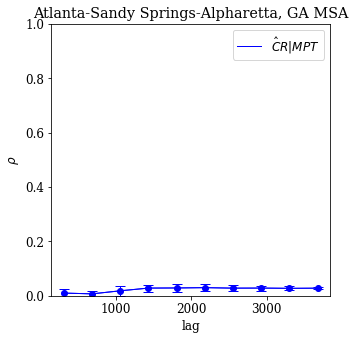

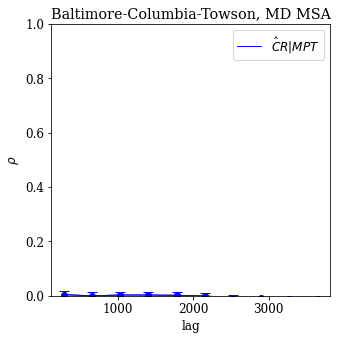

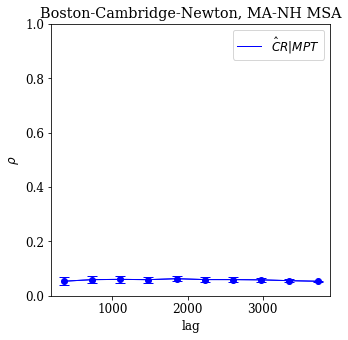

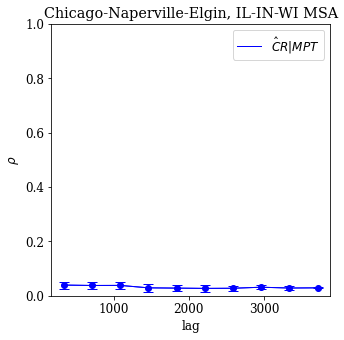

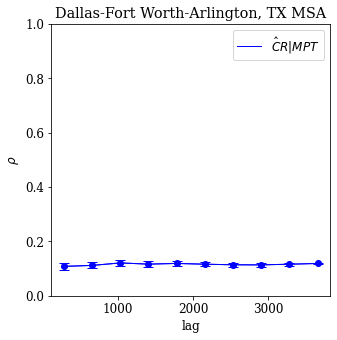

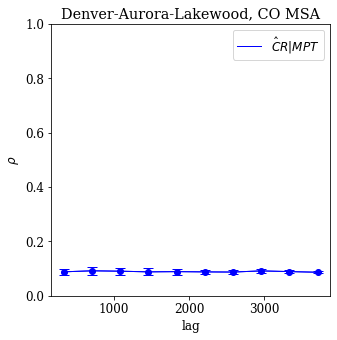

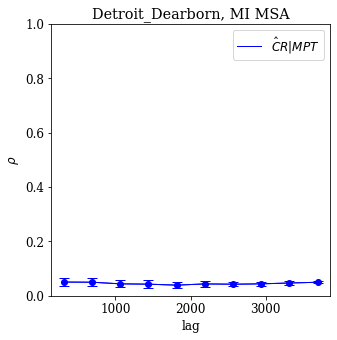

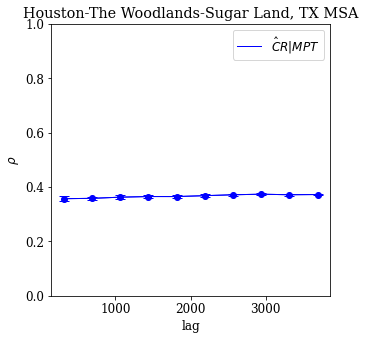

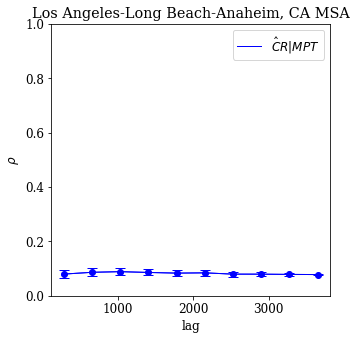

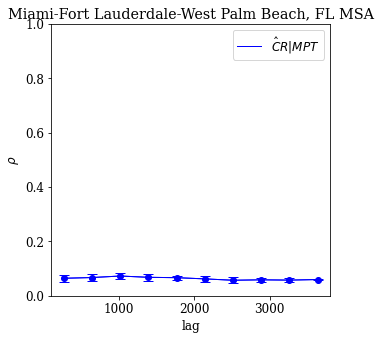

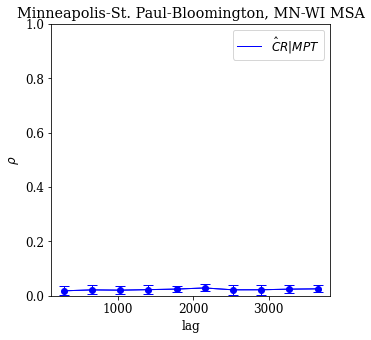

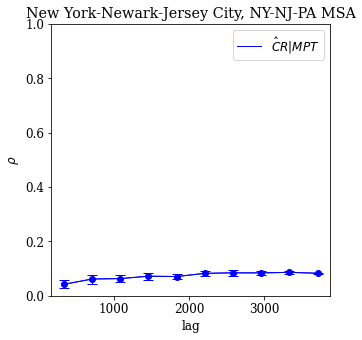

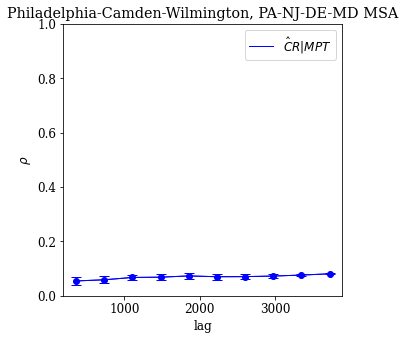

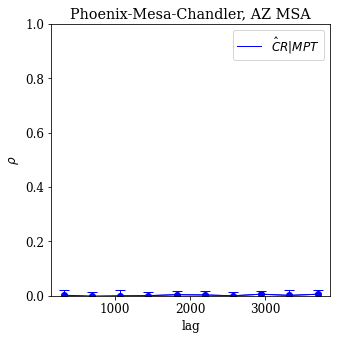

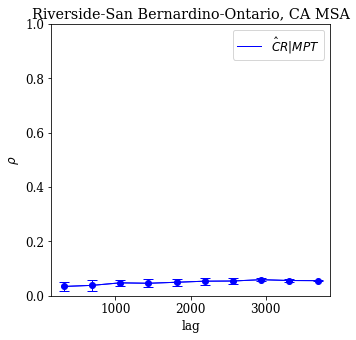

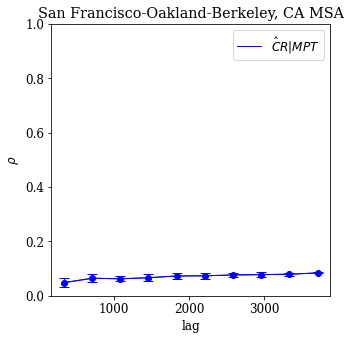

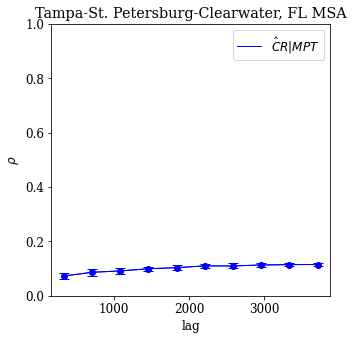

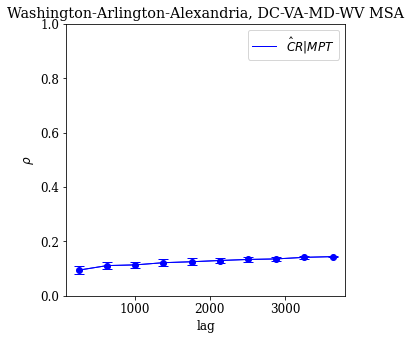

In [4]:
## negative_tweets and crimes
for i in range(len(lista)):
    df_source_hat_knowing_target= ccm.Get_CCM_Plot_df(
                          source = df[lista[i]+"_crimes_lagged"],
                          target = df["Tweet search - "+lista[i]+"_sent_Hugged_Positive"],
                          nsamp = 30, m_source=crimes_optimal_E[i], m_target=Pos_tweets_optimal_E[i],
                          tau_source=crimes_optimal_tau[i], tau_target=Pos_tweets_optimal_tau[i])
    df_source_hat_knowing_target.to_csv("Extended_CCM_data/Dialy_Lib_Lenght_Crimes_hat_knowing_pos_tweets_{}.csv".format(lista[i]))
    ccm.CCM_plot(df_source_hat_knowing_target,"CR", "PT", lista[i])

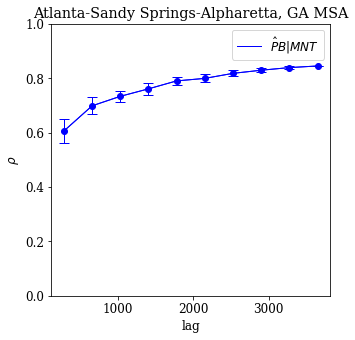

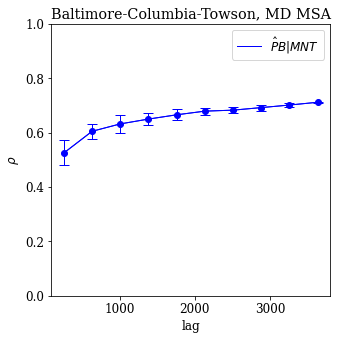

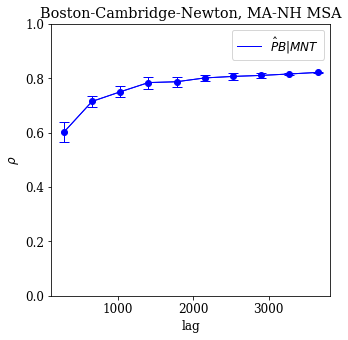

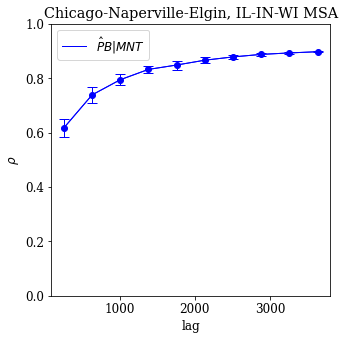

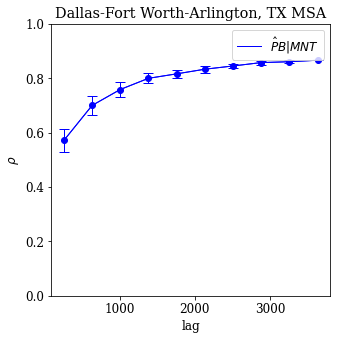

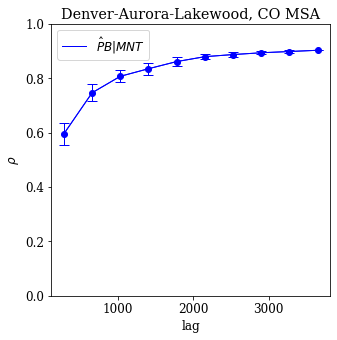

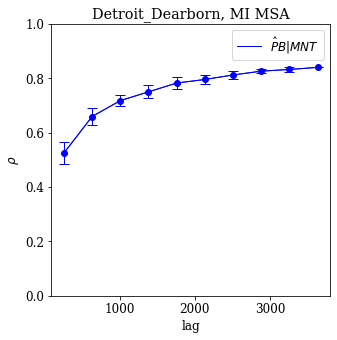

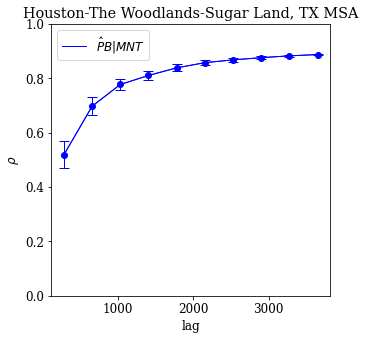

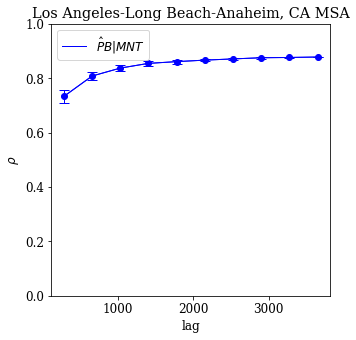

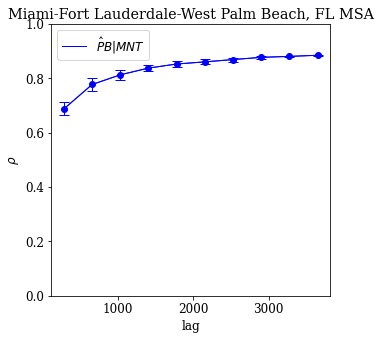

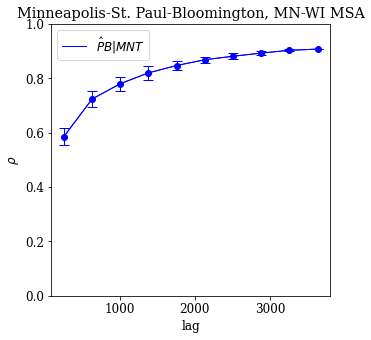

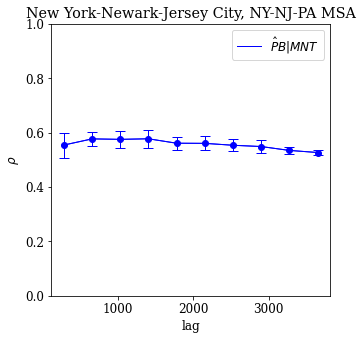

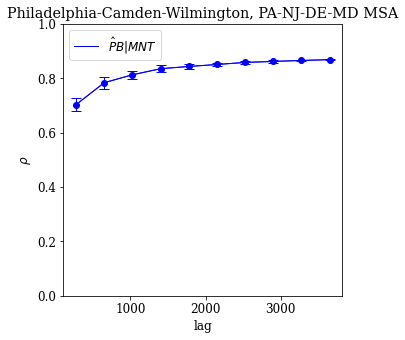

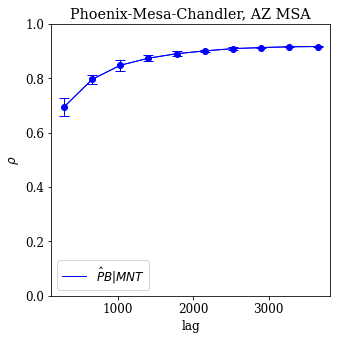

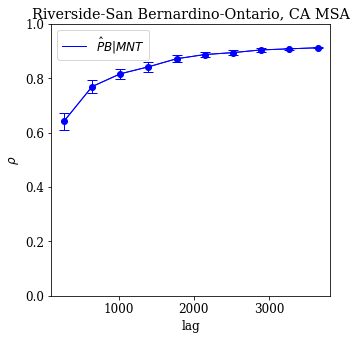

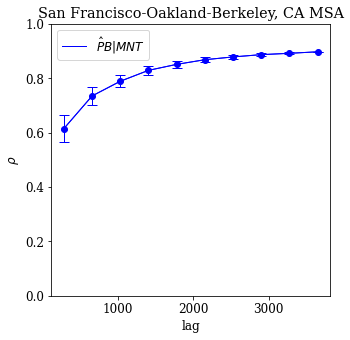

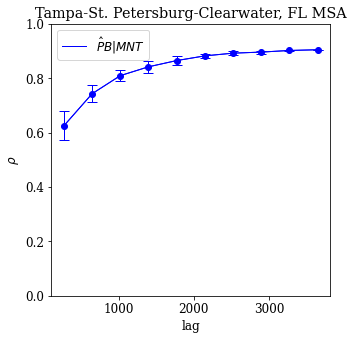

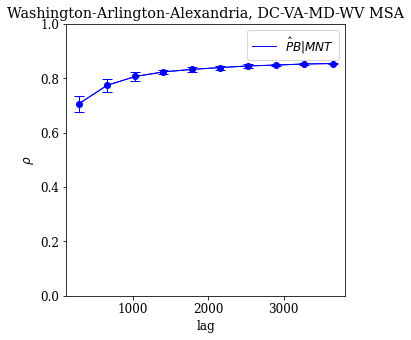

In [5]:
## negative_tweets and Police brutality
for i in range(len(lista)):
    df_source_hat_knowing_target= ccm.Get_CCM_Plot_df(
                          source = df["Police_Brutality_lagged"],
                          target = df["Tweet search - "+lista[i]+"_sent_Hugged_Negative"],
                          nsamp = 30, m_source=PB_optimal_E, m_target=Neg_tweets_optimal_E[i],
                          tau_source=PB_optimal_tau, tau_target=Neg_tweets_optimal_tau[i])
    df_source_hat_knowing_target.to_csv("Extended_CCM_data/Dialy_Lib_Lenght_PB_hat_knowing_neg_tweets_{}.csv".format(lista[i]))
    ccm.CCM_plot(df_source_hat_knowing_target,"PB", "NT", lista[i])